# 2-Utilisation de la méthode PCA

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
y=mnist['target'].astype('uint8')
X=mnist.data

In [4]:
data = pd.DataFrame(X)
data['y'] = y
data=pd.DataFrame(random.permutation(data)[0:10000])
y=data.iloc[:,-1].values.astype('uint8')
X_main = data.drop(784, axis=1).values

In [5]:
pca = PCA(n_components=2)
X=pca.fit_transform(X_main)

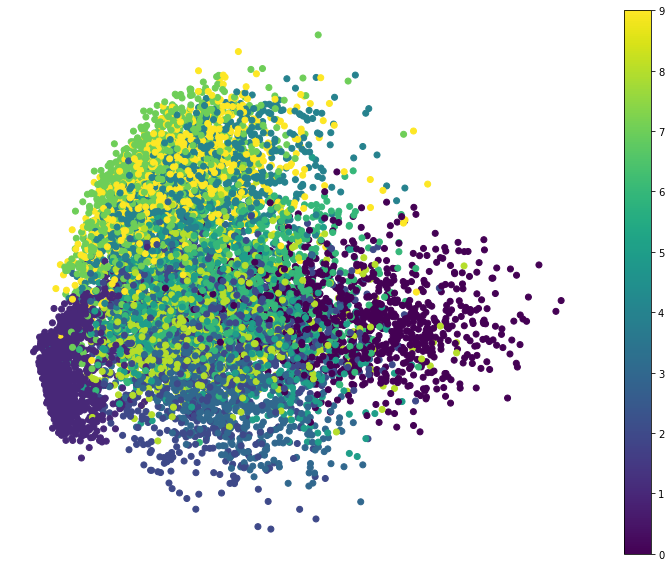

In [6]:
plt.figure(figsize=(13,10))
plt.scatter(X[:,0],X[:,1], c=y )
plt.axis('off')
plt.colorbar()
plt.show()

10.Le résultat d'affichage permet de donner une idée claire sur la distribution des instances de MNIST ?

L'affichage ne permet pas d'avoir une bonne vision de la distribution. On peut à la limite déterminer le 0 et le 1 mais sans que ça soit parfaitement claire.

# 3-Utilisation de la méthode t-SNE

In [9]:
tsne = TSNE(n_components=2)
X = tsne.fit_transform(X_main)

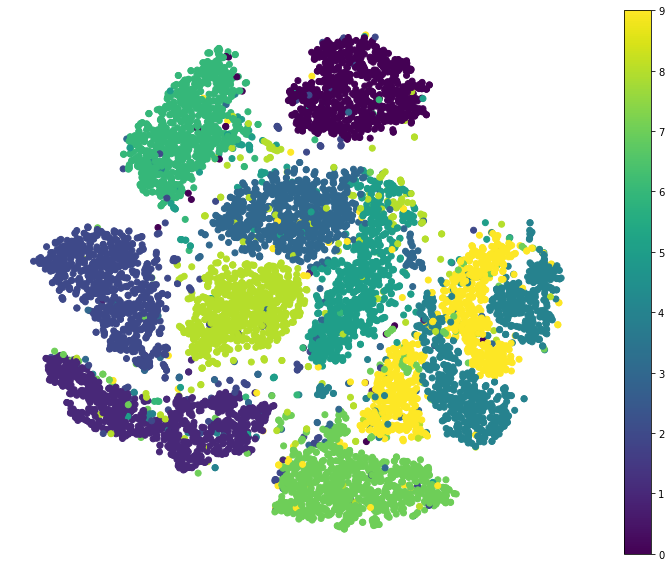

In [10]:
plt.figure(figsize=(13,10))
plt.scatter(X[:,0],X[:,1], c=y )
plt.axis('off')
plt.colorbar()
plt.show()

13.Existe-t-il des chevauchements entre quelques chiffres ? si oui lesquels ?

On peut observer un chevauchement entre les chiffres 4 et 9 

14.Comparez les résultats d'affichage de la méthode PCA et t-SNE

La méthode t-SNE est plus visible. Les valeurs sont mieux réparties.<br>
La méthode PCA est brouillon. On ne distingue pas de regroupements bien distincts

# III-PCA sur les données MNIST

## 1-Résultats de RandomForestSANS la réduction de la dimensionnalité des données

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

In [5]:
clf = RandomForestClassifier(n_estimators=100)
start = time.time()
clf = clf.fit(X_train, y_train)
end = time.time()
time = end-start
print("Durée: " + format(time, '.2f'))

Durée: 59.79


In [29]:
X_test.shape

(10000, 784)

In [30]:
X_train.shape

(60000, 784)

In [6]:
predicted_y_test = clf.predict(X_test)

In [7]:
 print('Accuracy: {}\n'.format(accuracy_score(y_test, predicted_y_test)))

Accuracy: 0.97



## 2-Résultats de RandomForest AVEC la réduction de la dimensionnalité des données 

In [37]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

In [38]:
pca = PCA(0.95)
X_train=pca.fit_transform(X_train)

In [39]:
clf = RandomForestClassifier(n_estimators=100)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
time_t = end-start
print("Durée: " + format(time_t, '.2f'))

Durée: 109.43


Le temps d'apprentissage est plus rapide que celui du II-1 ? C'est le résultat attendu ?

Le RandomForest est plus de 2 fois moins rapide avec la réduction. Ce n'est pas le résultat attendu

In [40]:
#19)
x_test=pca.transform(X_test)

In [43]:
#20)
predicted_y = clf.predict(x_test)

In [44]:
 print('Accuracy: {}\n'.format(accuracy_score(y_test, predicted_y)))

Accuracy: 0.9487



Comparez le résultat avec celui de la III-1

Avec réduction, nous avons un score inférieur mais qui reste quand même proche

21.L'application du PCA sur les données MNIST était fructueuse pour le temps d'apprentissage et le taux de classification dans le cas de RandomForest ?

Au vu des résultats, on ne peut pas dire qu'il y ait un avantage à utiliser le PCA dans un RandomForest: durée 2 fois plus longue pour un score inférieur.

## 3-Résultats de Softmax SANS la réduction de la dimensionnalité des données

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

In [49]:
clf = LogisticRegression()
start = time.time()
clf = clf.fit(X_train, y_train)
end = time.time()
time = end-start
print("Durée: " + format(time, '.2f'))

Durée: 19.04


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
predicted_y_test = clf.predict(X_test)

In [51]:
 print('Accuracy: {}\n'.format(accuracy_score(y_test, predicted_y_test)))

Accuracy: 0.9188



## 4-Résultats de Softmax AVEC la réduction de la dimensionnalité des données

In [58]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

In [59]:
pca = PCA(0.95)
X_train=pca.fit_transform(X_train)

In [64]:
clf = LogisticRegression()
start_x = time.time()
clf.fit(X_train, y_train)
end_x = time.time()
time_x = end_x-start_x
print("Durée: " + format(time_x, '.2f'))

Durée: 7.56


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.Le temps d'apprentissage est plus rapide que celui du II-1 ? C'est le résultat attendu ?

Le temps d'apprentissage est beaucoup plus rapide.

In [65]:
x_test=pca.transform(X_test)

In [66]:
predicted_y = clf.predict(x_test)

In [67]:
 print('Accuracy: {}\n'.format(accuracy_score(y_test, predicted_y)))

Accuracy: 0.922



3. Comparez le résultat avec celui de la III-3.

Nous avons un résultat faiblement supprérieur avec une réduction que sans.

4.L'application du PCA sur les données MNIST était fructueuse pour le temps d'apprentissage et le taux de classification dans le cas de Softmax ?

Je pense que l'application du PCA est furctueuse dans le sens où pour une faible perte de score, nous avons un gain significatif de temps de calcul

5.L'application du PCA sur les données contribue toujours à accélérer le temps de calcul du modèle d'apprentissage ? 

Comme nous avons pu le constater, l'utilisation du PCA n'est pas forcément bénéfique dans tous les cas de figure. Tout dépendra de la méthode utilisée.